In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Data Collection
df = pd.read_csv("Churn_Modelling.csv")


In [52]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
df.shape

(10000, 14)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
#Null Values check
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [56]:
#Duplicate values check
df.duplicated().sum()


np.int64(0)

In [57]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [58]:
df.select_dtypes(include=['float64', 'int64']).skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [10]:
pip install pandas numpy matplotlib seaborn scikit-learn flask


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


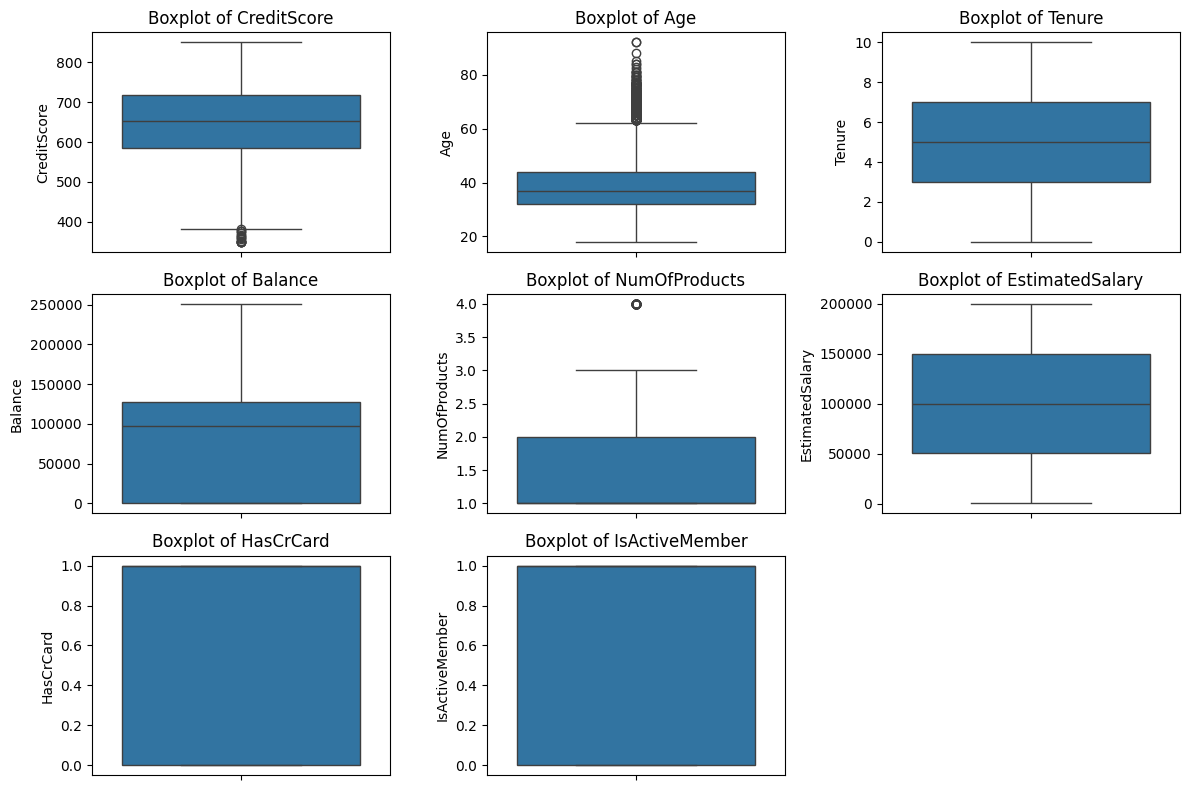

In [59]:
#Boxplot for checking outliers
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to check for outliers
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember']

# Plotting boxplots for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [60]:
# Outliers in every numerical feature
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detecting outliers for each numerical feature
for feature in numerical_features:
    outliers = detect_outliers_iqr(df, feature)
    print(f"Number of outliers in {feature}: {len(outliers)}")


Number of outliers in CreditScore: 15
Number of outliers in Age: 359
Number of outliers in Tenure: 0
Number of outliers in Balance: 0
Number of outliers in NumOfProducts: 60
Number of outliers in EstimatedSalary: 0
Number of outliers in HasCrCard: 0
Number of outliers in IsActiveMember: 0


In [61]:
# Outliers removal
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying the removal for each numerical feature
for feature in numerical_features:
    df_cleaned = remove_outliers(df, feature)


In [62]:
#Data Validation
invalid_age = df[(df['Age'] < 0) | (df['Age'] > 120)]
print("Rows with invalid Age values:")
print(invalid_age)

invalid_credit_score = df[(df['CreditScore'] < 300) | (df['CreditScore'] > 850)]
print("Rows with invalid CreditScore values:")
print(invalid_credit_score)

invalid_products = df[(df['NumOfProducts'] < 1) | (df['NumOfProducts'] > 4)]
print("Rows with invalid NumOfProducts values:")
print(invalid_products)

contradictory_data = df[(df['NumOfProducts'] == 0) & (df['IsActiveMember'] == 1)]
print("Rows with contradictory data (NumOfProducts == 0 but ActiveMember == 1):")
print(contradictory_data)

print("Unique values in Gender column:")
print(df['Gender'].unique())

print("Unique values in Geography column:")
print(df['Geography'].unique())

print("Unique values in IsActiveMember column:")
print(df['IsActiveMember'].unique())

print("Unique values in HasCrCard column:")
print(df['HasCrCard'].unique())



Rows with invalid Age values:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
Rows with invalid CreditScore values:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
Rows with invalid NumOfProducts values:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
Rows with contradictory data (NumOfProducts == 0 but ActiveMember == 1):
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
Unique values in Gender column:
['Female' 'Male']
Unique values

In [63]:
#Label encoding for gender feature and one hot encoding for geography feature
from sklearn.preprocessing import LabelEncoder

label_enco = LabelEncoder()
df['Gender'] = label_enco.fit_transform(df['Gender'])  # Male = 1, Female = 0

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # Avoiding dummy variable trap

In [64]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [65]:
# Data types check and checking for non numeric values
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for n in numerical_features:
    invalid_values = df[pd.to_numeric(df[n], errors='coerce').isna()]
    print("Rows with invalid " + n + "values:")
    print(invalid_values)



Rows with invalid CreditScorevalues:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Geography_Germany, Geography_Spain]
Index: []
Rows with invalid Agevalues:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Geography_Germany, Geography_Spain]
Index: []
Rows with invalid Tenurevalues:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Geography_Germany, Geography_Spain]
Index: []
Rows with invalid Balancevalues:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Geography_Germany, Geography_Spain]
Index: []
Rows with inv

In [66]:
#Scaling and normalization
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [67]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False
1,2,15647311,Hill,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True
2,3,15619304,Onio,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False
3,4,15701354,Boni,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False
4,5,15737888,Mitchell,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True


In [68]:
#Features required for our model training
final_dataset = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', "Geography_Spain"]]


In [69]:
# Final dataset
final_dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False
1,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False
3,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False
4,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True


In [70]:
#Converting to csv
final_dataset.to_csv('final_dataframe.csv', index=False)


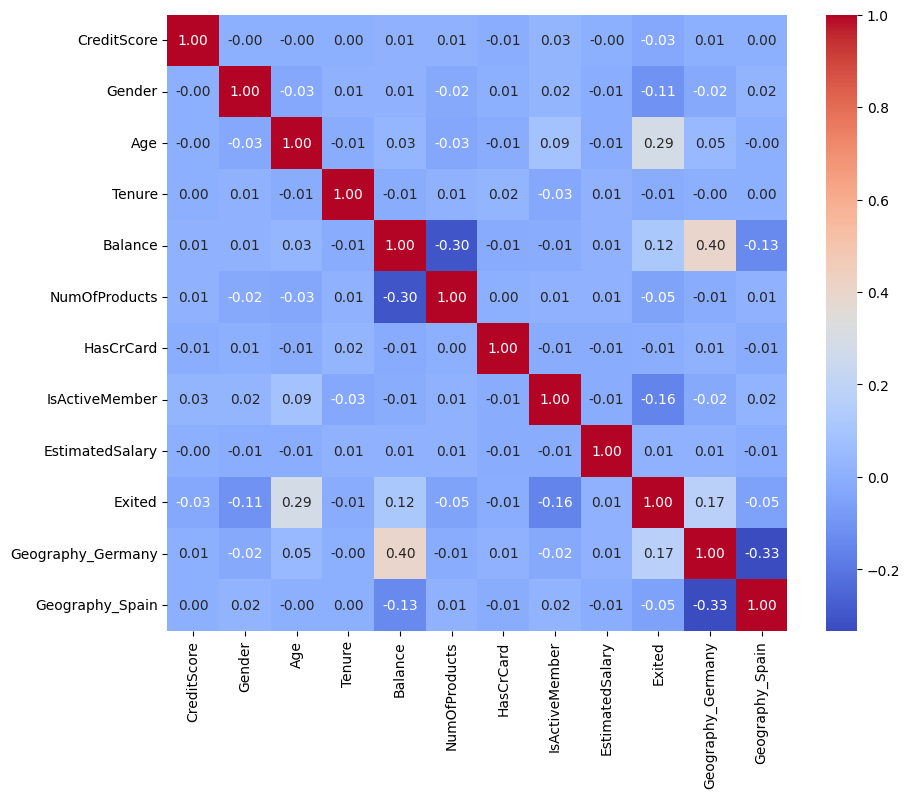

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
# correlation matrix
corr_matrix = final_dataset.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#As we can see there is no correlation greater than 0.4 so we cannot reduce dimensions based on high correlations

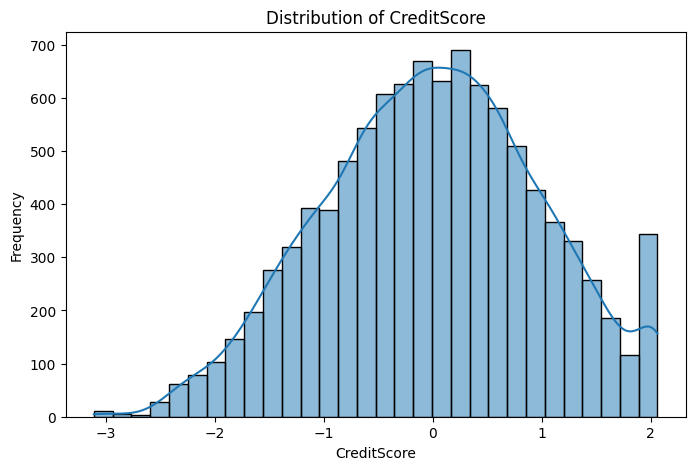

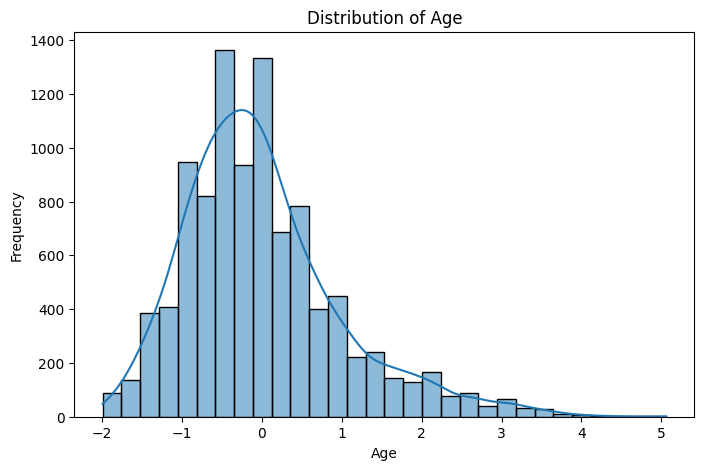

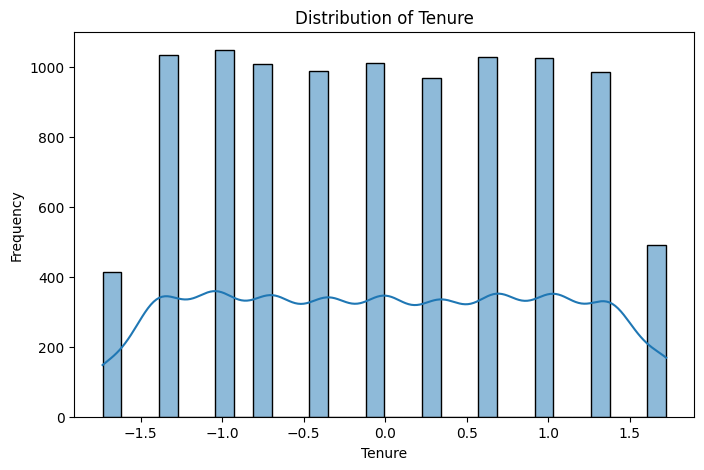

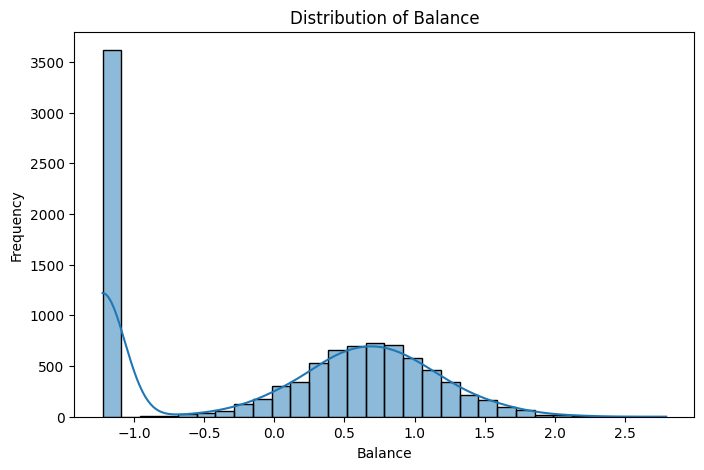

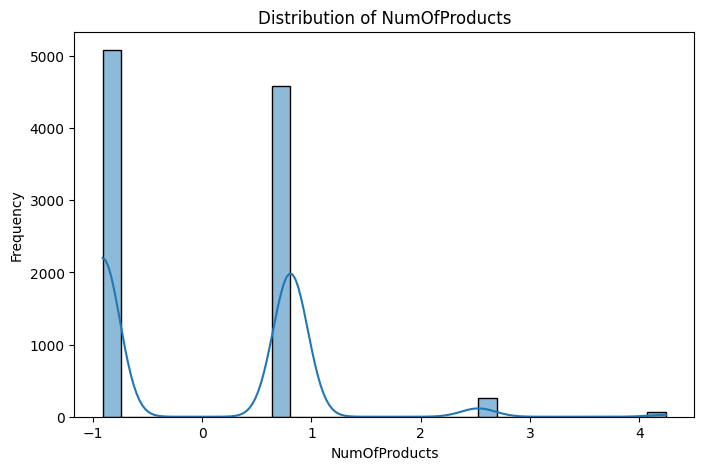

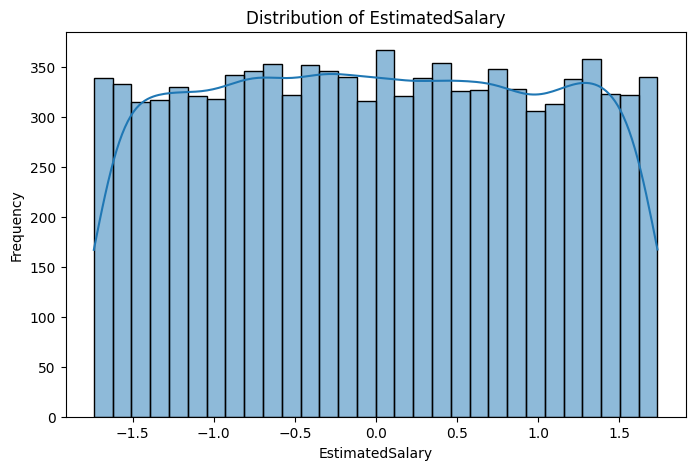

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features to visualize
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Plot histograms and density plots
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


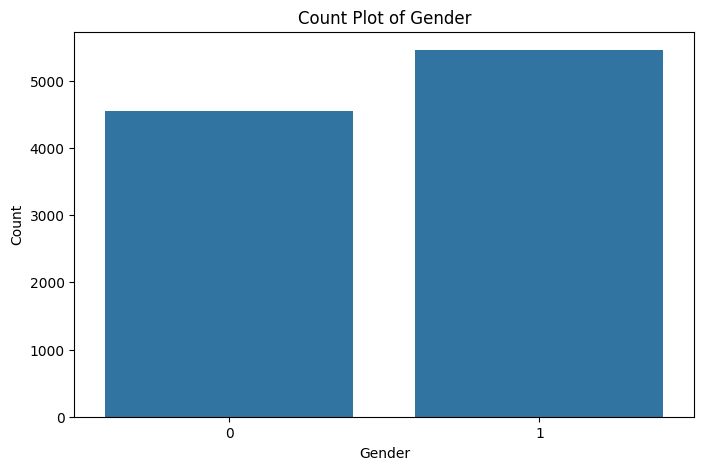

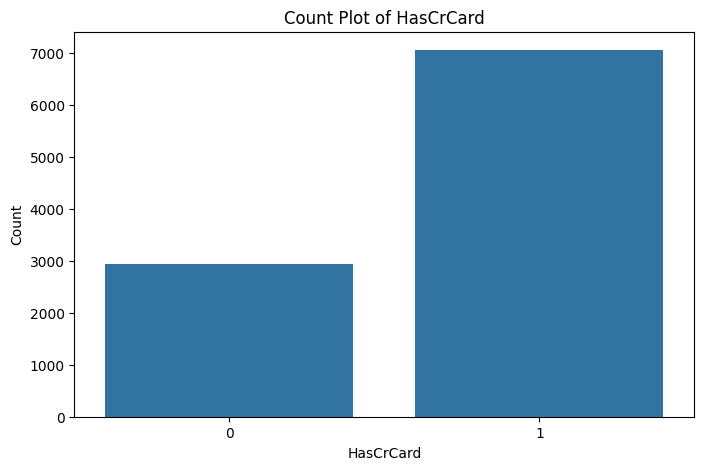

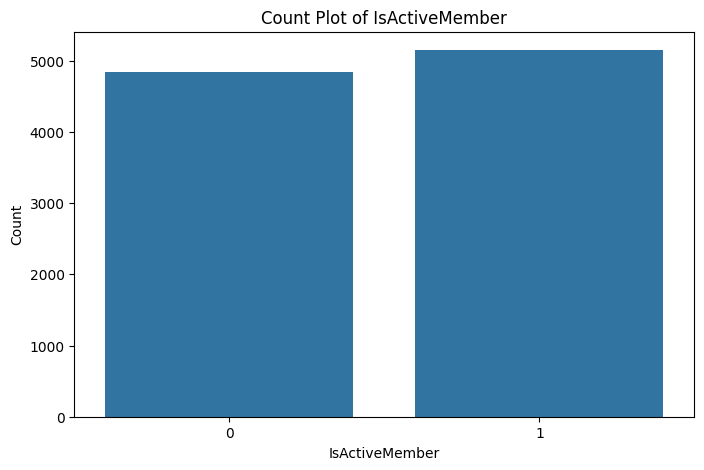

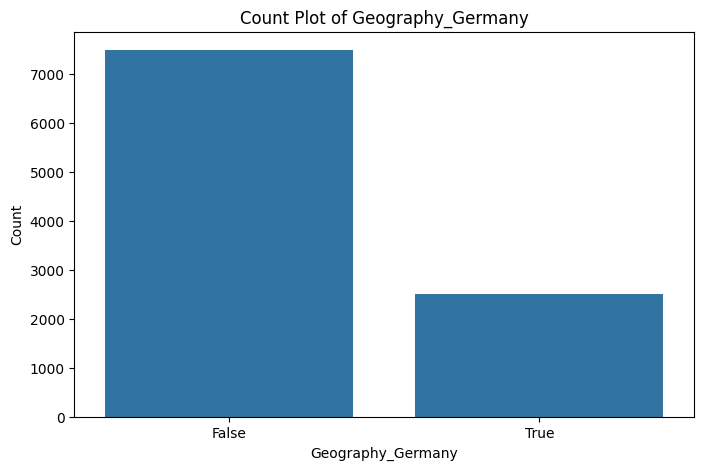

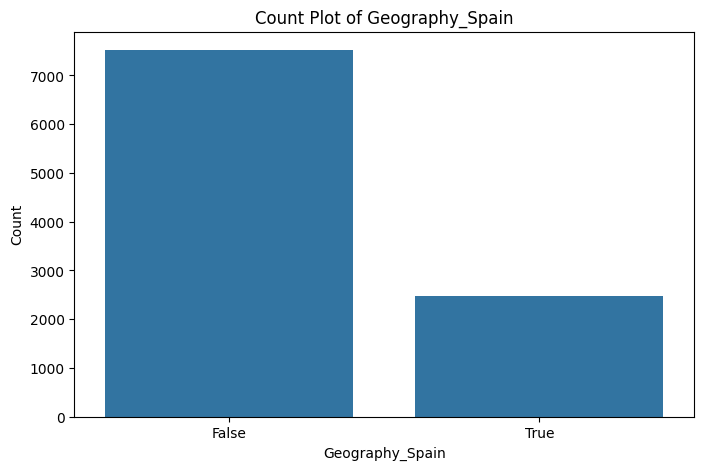

In [73]:
# List of categorical features
categorical_features = ['Gender', 'HasCrCard', 'IsActiveMember', 'Geography_Germany', 'Geography_Spain']

# Plot bar charts for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[feature])
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


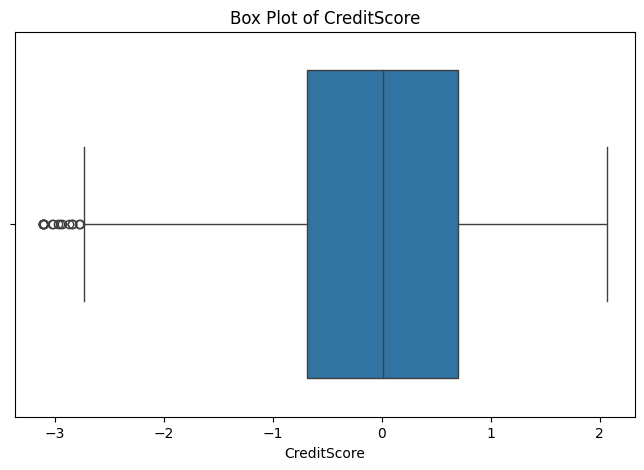

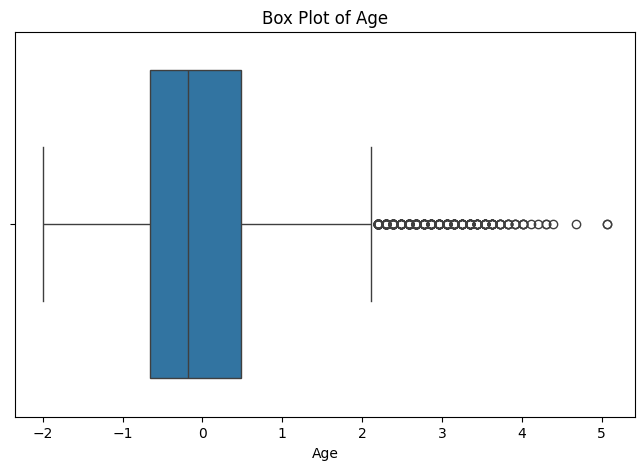

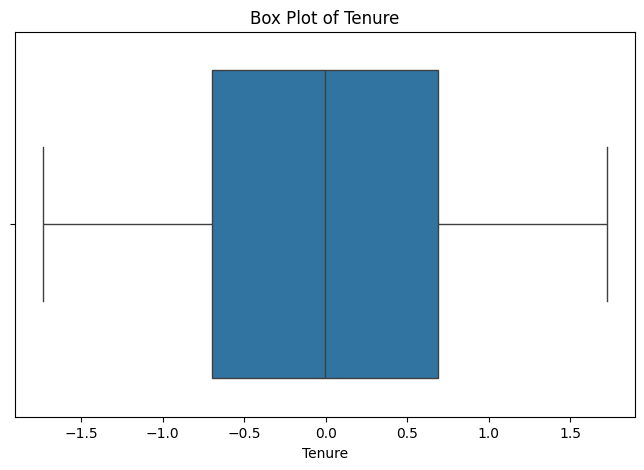

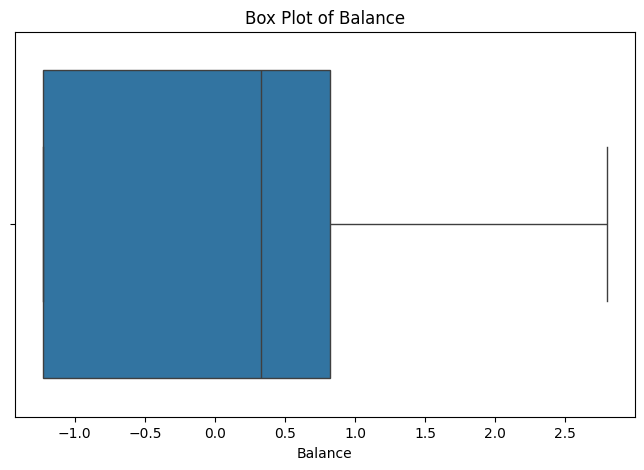

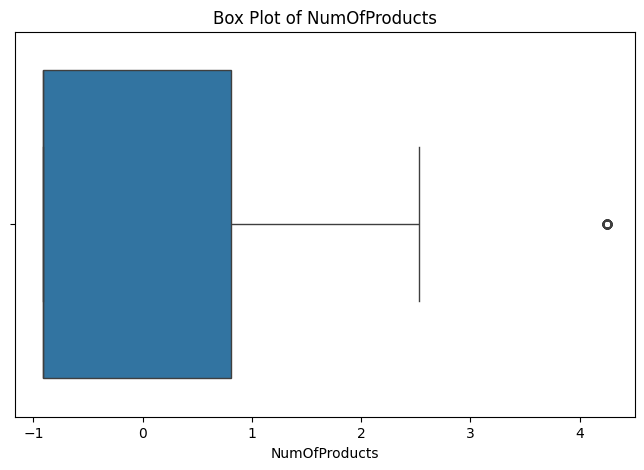

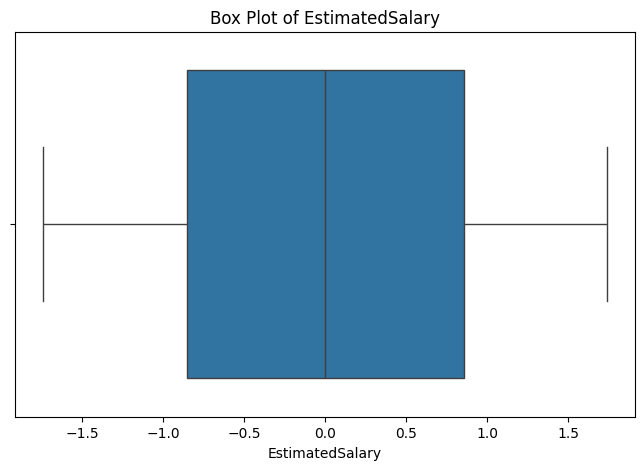

In [74]:
# Plot box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()


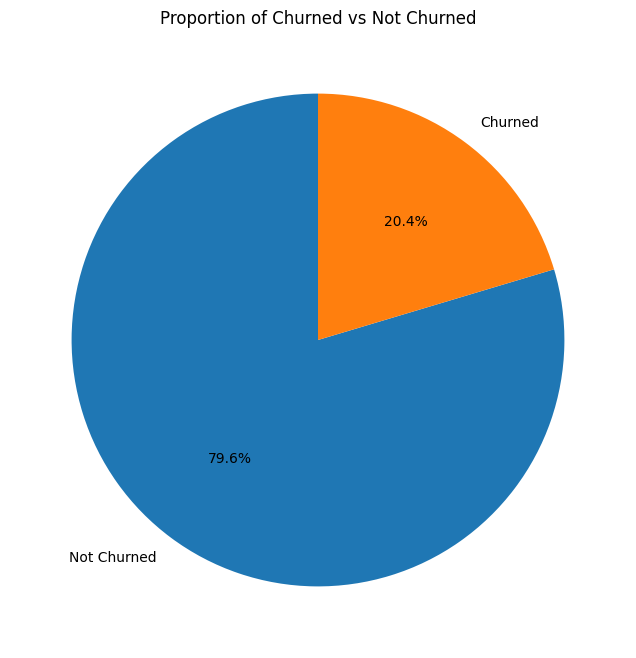

In [75]:
# Pie chart for target variable
churn_counts = df['Exited'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Churned vs Not Churned')
plt.show()


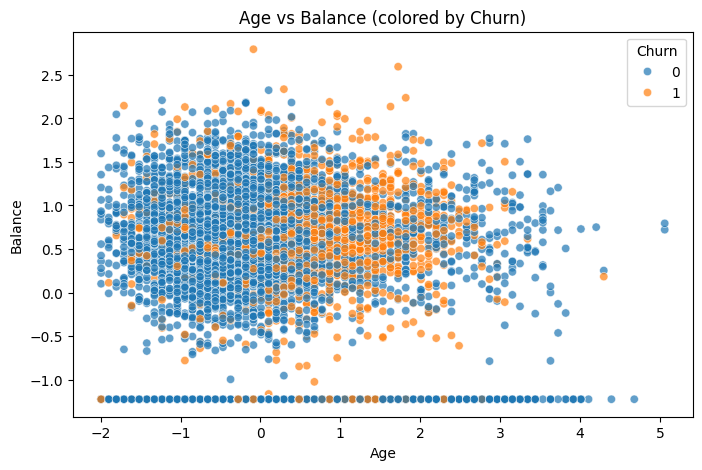

In [76]:
# Scatter plot between Age and Balance
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Balance', data=df, hue='Exited', alpha=0.7)
plt.title('Age vs Balance (colored by Churn)')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Churn')
plt.show()


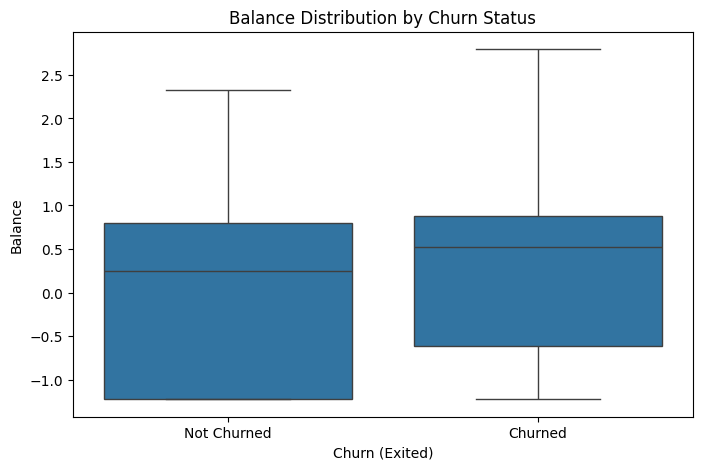

In [77]:
# Box plot for Balance vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Churn (Exited)')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()


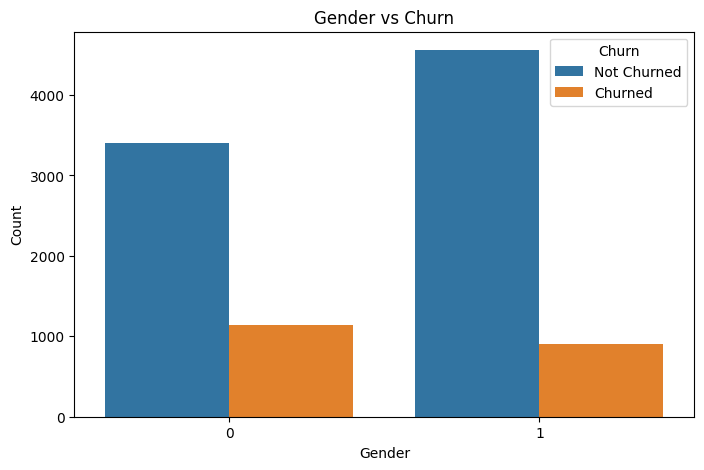

In [78]:
# Count plot for Gender vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


In [79]:
from sklearn.model_selection import train_test_split

df = final_dataset
# Defining features (X) and target (y)
X = df.drop('Exited', axis=1)  # 'Exited' is the target variable indicating churn
y = df['Exited']

# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Initializing the model
model = RandomForestClassifier(random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)


Accuracy: 0.87
Precision: 0.77
Recall: 0.46
F1 Score: 0.57
ROC AUC Score: 0.71
Confusion Matrix:
[[1552   55]
 [ 213  180]]


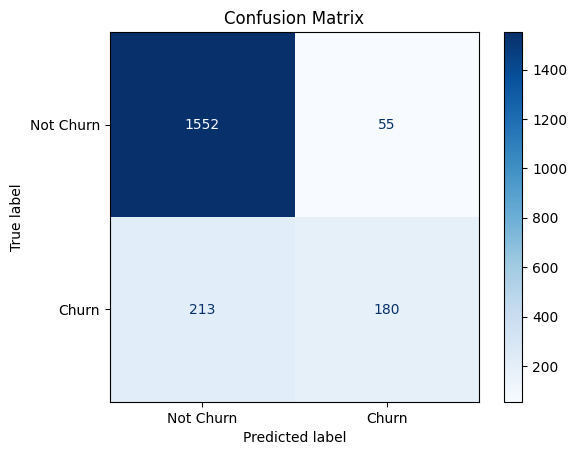

In [81]:
## Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


# Printing the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.81
Precision: 0.56
Recall: 0.20
F1 Score: 0.30
ROC AUC Score: 0.78
Confusion Matrix:
[[1544   63]
 [ 314   79]]


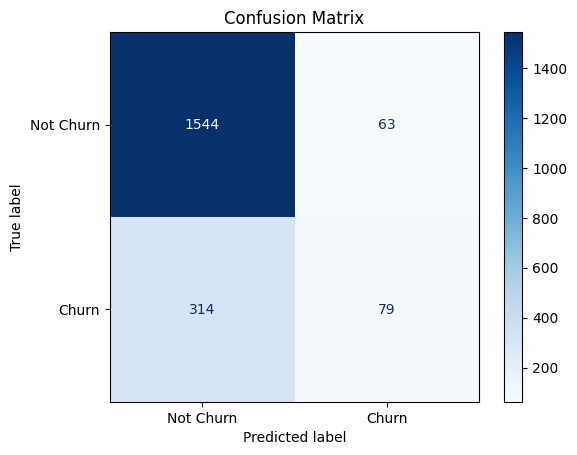

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initializing the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Training the model on the training data
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])  # Use predict_proba for ROC AUC
cm = confusion_matrix(y_test, y_pred)


# Printing the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [39]:
!pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/20


C:\Users\Soman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7993 - loss: 0.4847 - val_accuracy: 0.8306 - val_loss: 0.3908
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8386 - loss: 0.3834 - val_accuracy: 0.8494 - val_loss: 0.3618
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.3645 - val_accuracy: 0.8531 - val_loss: 0.3535
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8510 - loss: 0.3558 - val_accuracy: 0.8456 - val_loss: 0.3510
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.3483 - val_accuracy: 0.8506 - val_loss: 0.3457
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.3460 - val_accuracy: 0.8537 - val_loss: 0.3464
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.3374 - val_accuracy: 0.8531 - val_loss: 0.3445
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8589 - loss: 0.3461 - val_accuracy: 0.8531 - val_

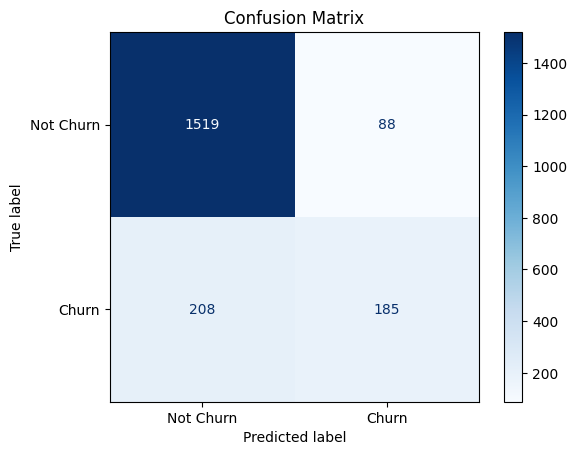

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the model
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predicting probabilities and converting them to binary labels
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Evaluate the model with common classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)


# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



In [85]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],        # Depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples in a leaf
    'max_features': ['sqrt', 'log2'],       # Number of features to consider at each split
}

# Initializing the model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


Accuracy: 0.8640
Precision: 0.7574
Recall: 0.4529
F1 Score: 0.5669
ROC AUC: 0.8689
Confusion Matrix:
[[1550   57]
 [ 215  178]]


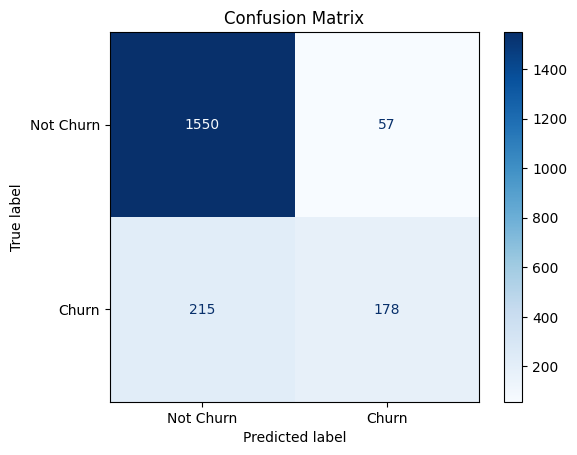

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # For ROC/AUC

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [38]:
pip install flask


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import pickle
pickle.dump(model, open('random_forest_model.pkl', 'wb'))


In [40]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [46]:
import pickle
pickle.dump(best_model, open('random_forest_model_updated.pkl', 'wb'))